# <font color=green>CARDIOTOCOGRAPHY MODEL</font>
The dataset consists of measurements of **fetal heart rate (FHR)** and **uterine contraction (UC)** features on cardiotocograms classified by expert obstetricians to **predict** the **condition of the fetal**

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET

In [2]:
ctg = pd.read_excel('CTG.xls' , sheet_name = 2)

# ANALYSIS OF DATAFRAME

In [3]:
ctg.describe()

,Date,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,1996-04-22 16:59:22.746942592,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
min,1980-01-04 00:00:00,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1996-05-02 00:00:00,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,1996-08-21 00:00:00,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1997-03-20 00:00:00,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,1998-06-06 00:00:00,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000
std,NaN,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377


In [4]:
ctg.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

***Features:<br>***
*LB - FHR baseline (beats per minute)<br>
AC - # of accelerations per second<br>
FM - # of fetal movements per second<br>
UC - # of uterine contractions per second<br>
DL - # of light decelerations per second<br>
DS - # of severe decelerations per second<br>
DP - # of prolongued decelerations per second<br>
ASTV - percentage of time with abnormal short term variability<br>
MSTV - mean value of short term variability<br>
ALTV - percentage of time with abnormal long term variability<br>
MLTV - mean value of long term variability<br>
Width - width of FHR histogram<br>
Min - minimum of FHR histogram<br>
Max - Maximum of FHR histogram<br>
Nmax - # of histogram peaks<br>
Nzeros - # of histogram zeros<br>
Mode - histogram mode<br>
Mean - histogram mean<br>
Median - histogram median<br>
Variance - histogram variance<br>
Tendency - histogram tendency<br>
CLASS - FHR pattern class code (1 to 10)<br>
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)*

In [5]:
#dropping unneccesary columns
dropping_cols = {"FileName","Date", "SegFile", "b", "e", "LBE","A", "B", "C", "D", "E", "AD", "DE", "LD", "FS", "SUSP"}
ctg.drop(dropping_cols, axis= 1, inplace = True)
#dropping unneccesary row
ctg.drop([0], axis = 0, inplace = True)
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 1 to 2129
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  DR        2128 non-null   float64
 12  Width     2126 non-null   float64
 13  Min       2126 non-null   float64
 14  Max       2126 non-null   float64
 15  Nmax      2126 non-null   float64
 16  Nzeros    2126 non-null   float64
 17  Mode      2126 non-null   float64
 18  Mean      2126 non-null   float64
 19  Median    2126 non-null   float64
 20  Variance  2126 non-null   floa

In [6]:
ctg.isnull().sum()

LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [7]:
# missing value handling function
def missingValueFixer(df, target_label):
    if df[target_label].isnull().sum() > 0:
        df.dropna(subset = target_label, inplace= True)
        
    from sklearn.impute import SimpleImputer
        
    imputer = SimpleImputer(strategy='median')
    imputer.fit(df)
    df_tr = imputer.transform(df)
    df = pd.DataFrame(df_tr, columns = df.columns)
    return df

In [8]:
target = "NSP"
ctg = missingValueFixer(ctg, target)

In [9]:
ctg

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0


In [10]:
ctg.isnull().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [11]:
ctg['NSP'].unique()

array([2., 1., 3.])

In [12]:
ctg

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0


# VISUALISATION OF DATA

Text(0.5, 0, 'Normal(1)/Suspect(2)/Pathological(3)')

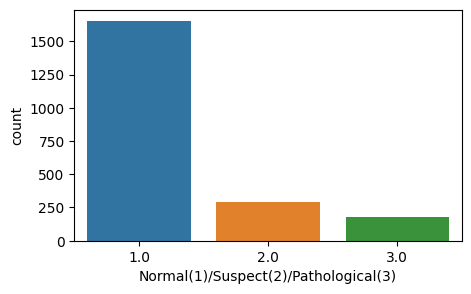

In [13]:
#ploting countplot NSP(Condition of the Fetal)
plt.figure(figsize=(5,3))
sns.countplot(x='NSP',data=ctg)
plt.xlabel("Normal(1)/Suspect(2)/Pathological(3)")

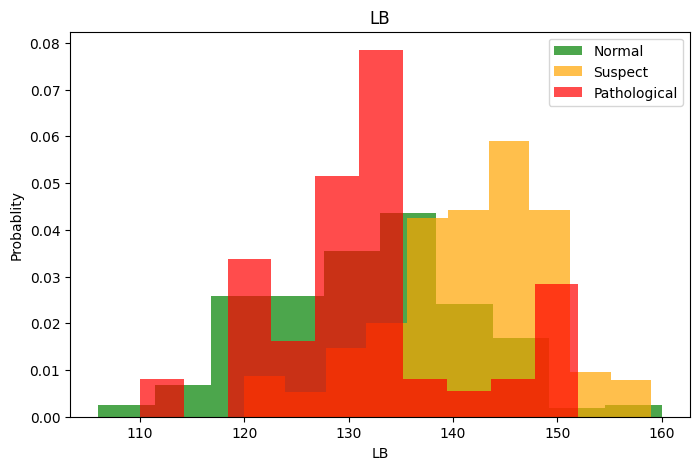

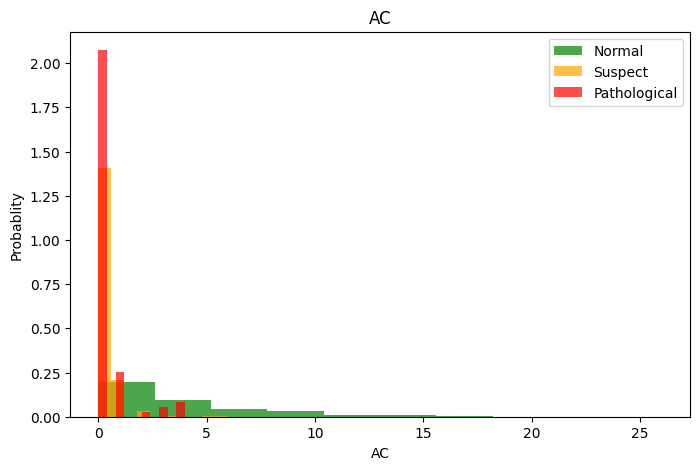

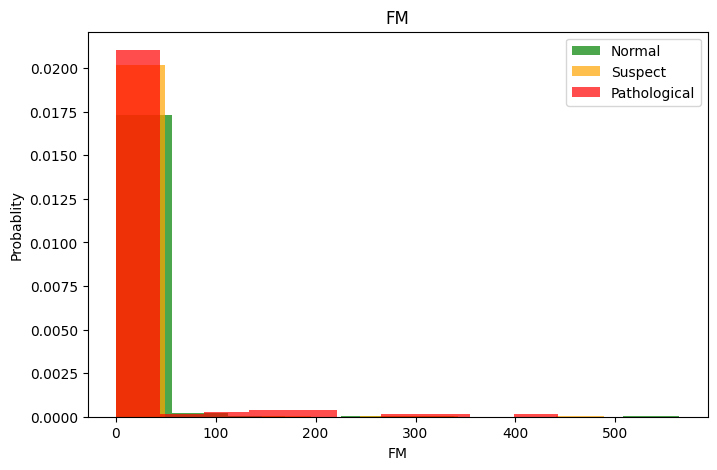

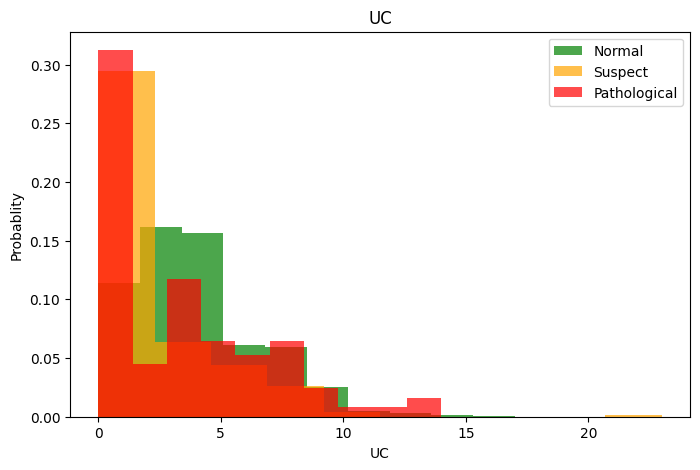

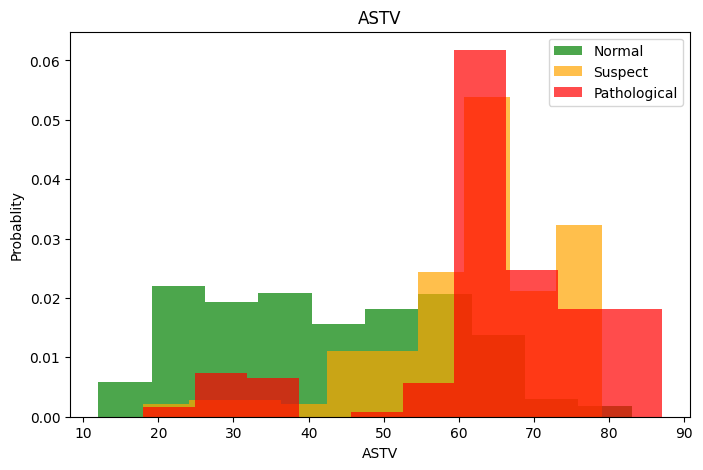

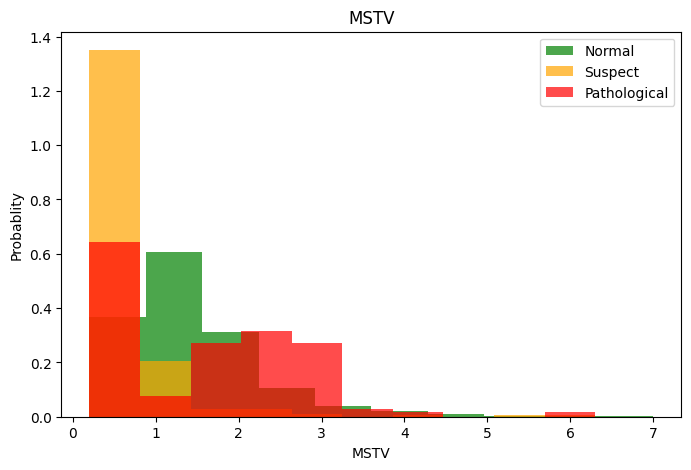

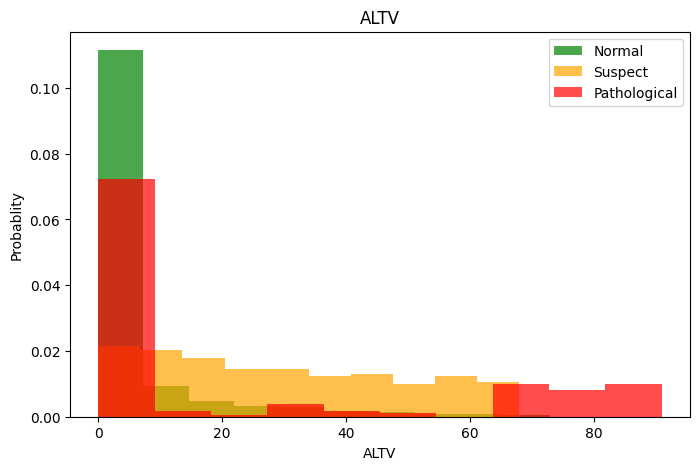

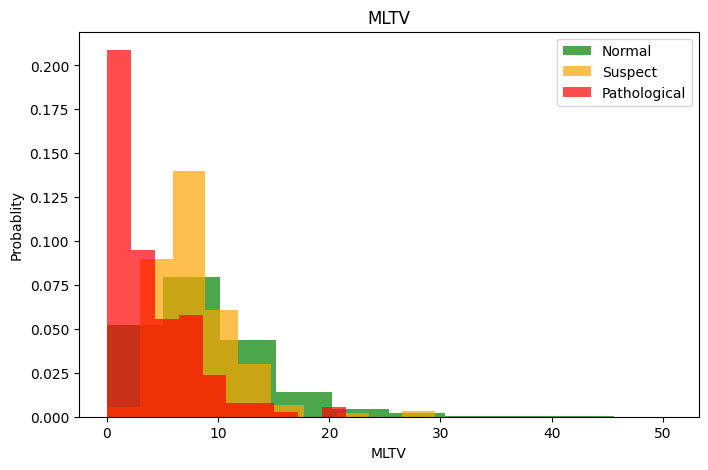

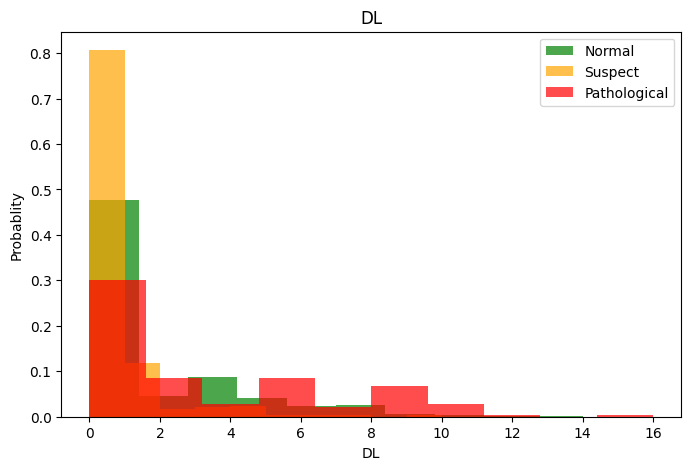

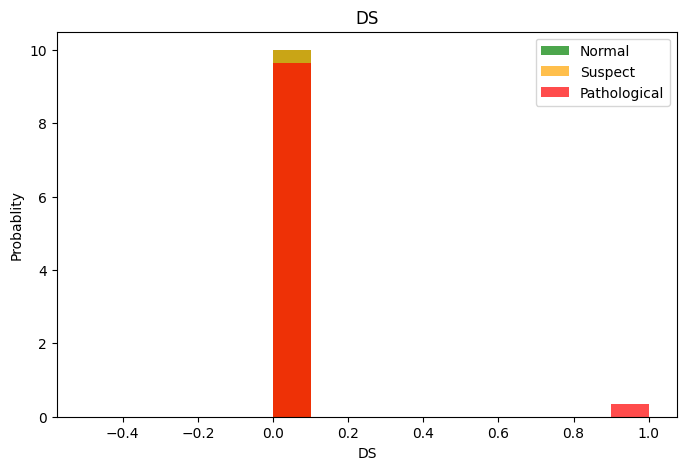

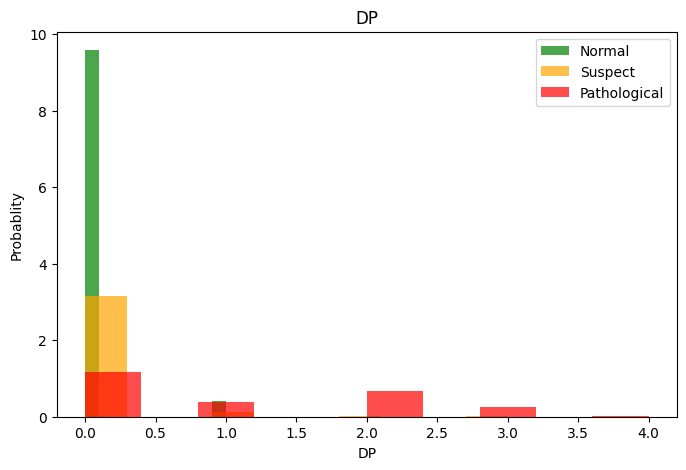

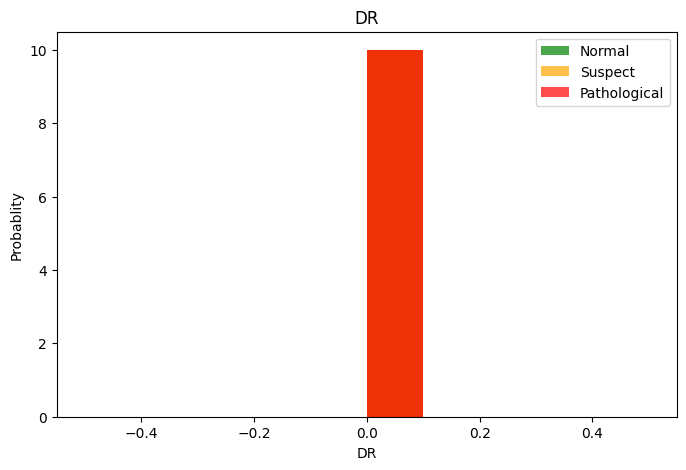

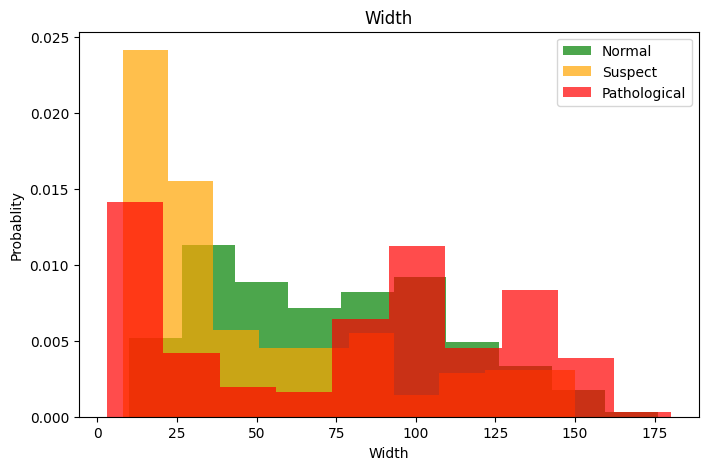

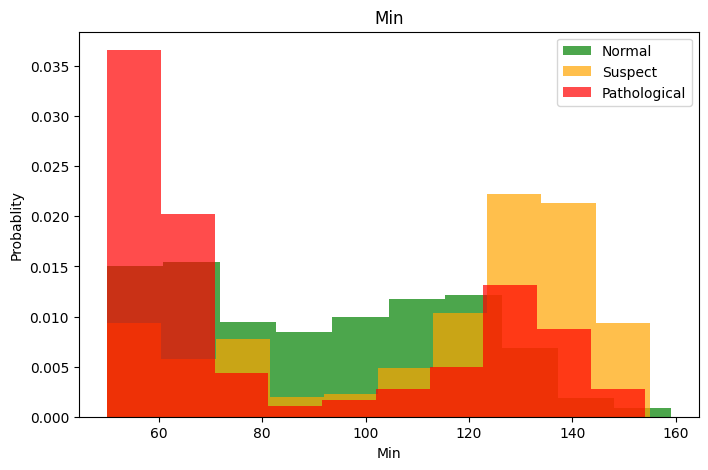

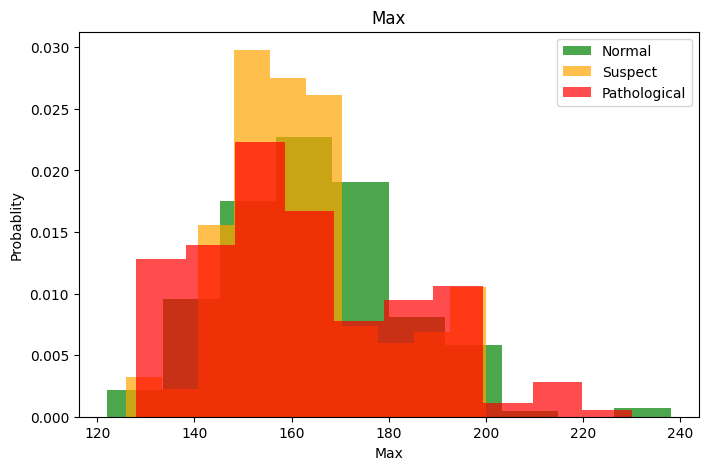

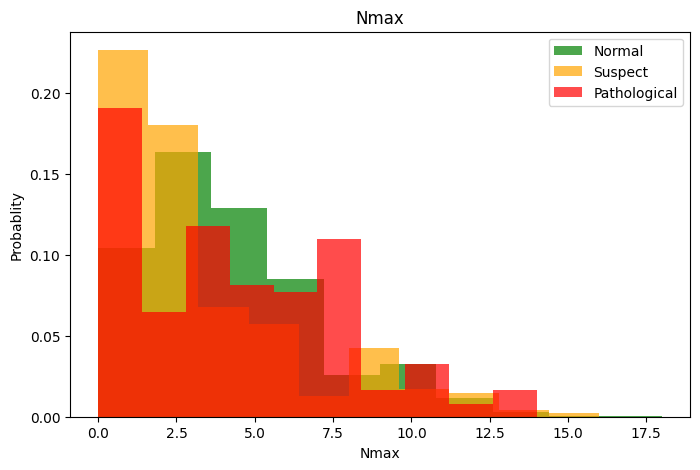

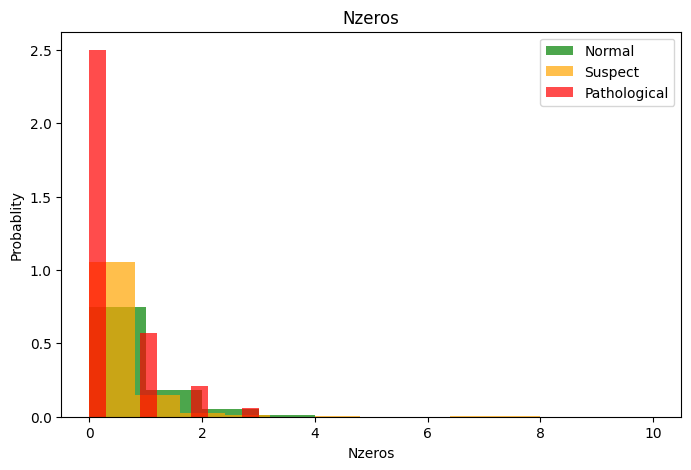

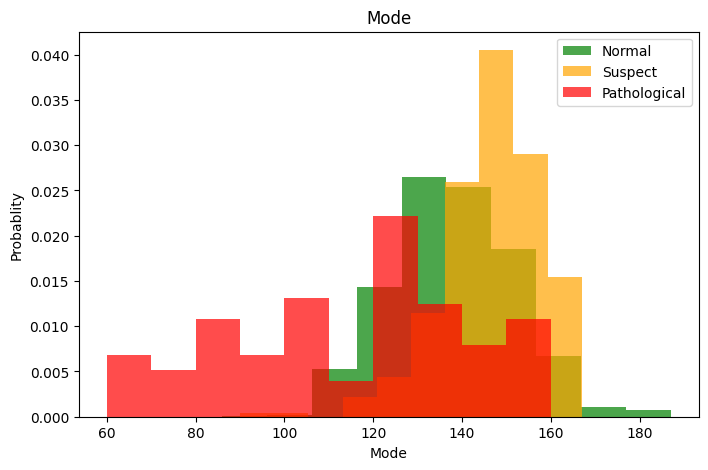

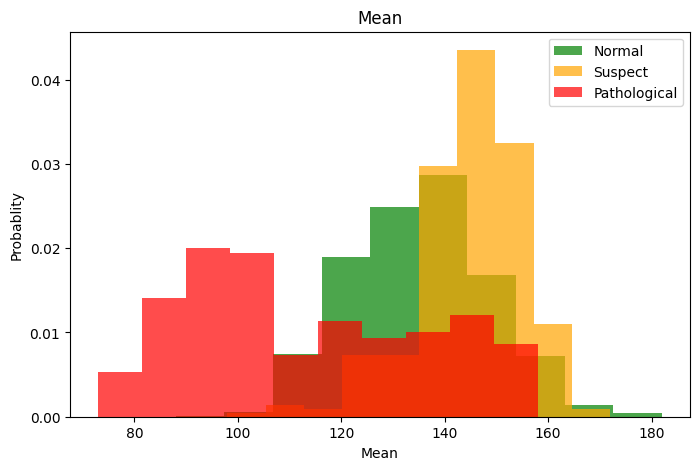

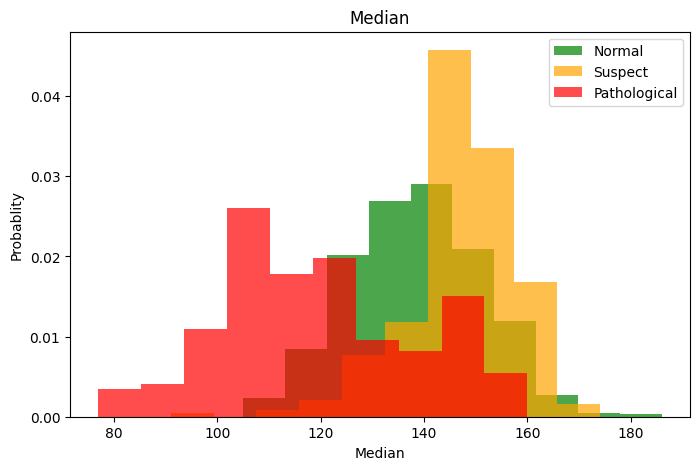

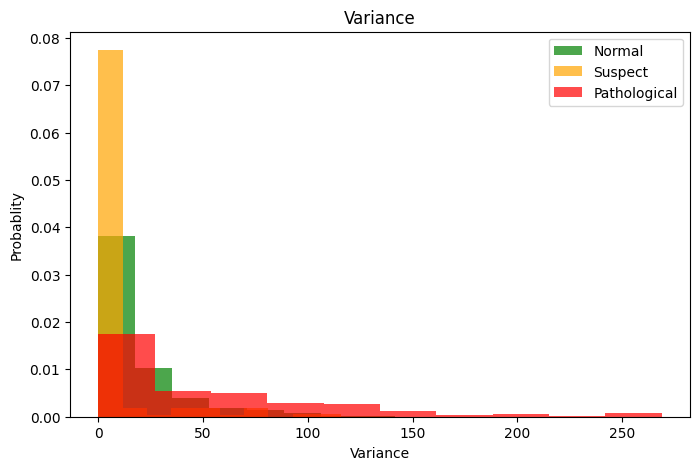

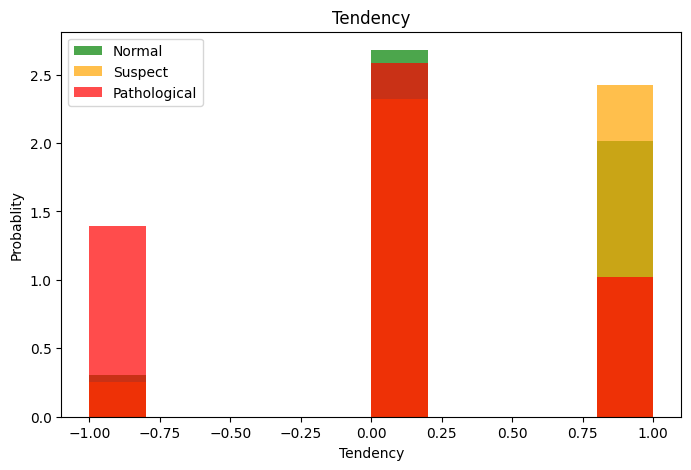

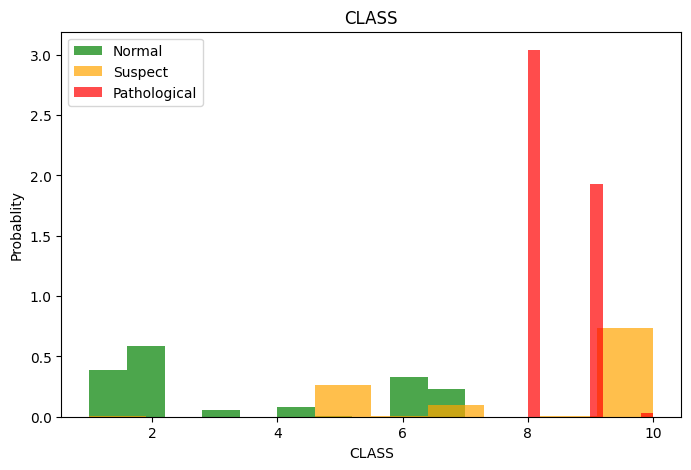

In [14]:
for label in ctg.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.hist(ctg[ctg['NSP'] == 1][label], color = 'Green', label = 'Normal', alpha = 0.7, density = True)
    plt.hist(ctg[ctg['NSP'] == 2][label], color = 'Orange', label = 'Suspect', alpha = 0.7, density = True)
    plt.hist(ctg[ctg['NSP'] == 3][label], color = 'Red', label = 'Pathological', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probablity")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

# STANDARDIZING THE DATA

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ctg.drop('NSP',axis=1))

StandardScaler()

# MODELLING
**Split data into train and test**

In [16]:
from sklearn.model_selection import train_test_split
X=ctg.drop('NSP',axis=1)
y=ctg['NSP']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# CLASSIFICATION
***Support Vector Machine***

In [17]:
from sklearn.svm import SVC
svc=SVC(C = 100, kernel = 'poly')
svc.fit(X_train,y_train)
svm=svc.score(X_test,y_test)

In [18]:
#cross validation to find the best parameter for the support vector claassifier
from sklearn.model_selection import GridSearchCV

params = {'kernel': ('rbf','poly'), 'C': [1, 10, 100]}

clf = GridSearchCV(svc, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(C=100, kernel='poly'),
             param_grid={'C': [1, 10, 100], 'kernel': ('rbf', 'poly')})

In [19]:
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [20]:
svm

0.9717868338557993

***Random forest***

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf=rf.score(X_test,y_test)

***K-Nearest Neighbours***

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn=knn.score(X_test,y_test)

***Decision tree***

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
dtc.fit(X_train,y_train)
dt=dtc.score(X_test,y_test)

In [24]:
#cross validation to find the best parameter for the decision tree classifier
param = {'criterion' : ('gini', 'entropy'),   'max_depth' : [2,4,6,8,10,12]}

gsv = GridSearchCV(dtc, param)
gsv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [25]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [26]:
dt

0.9858934169278997

***Naive bayes***

In [27]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb=nb.score(X_test,y_test)

# EVALUATING CLASSIFIERS

In [28]:
models_classification = pd.DataFrame({
    'Model': ['KNN', 'SVM', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [knn,svm,rf,nb,dt]})

In [29]:
# show all the models 
models_classification.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,0.985893
2,Random Forest,0.979624
1,SVM,0.971787
0,KNN,0.907524
3,Naive Bayes,0.876176


# PLOTTING THE MODEL/SCORE GRAPH

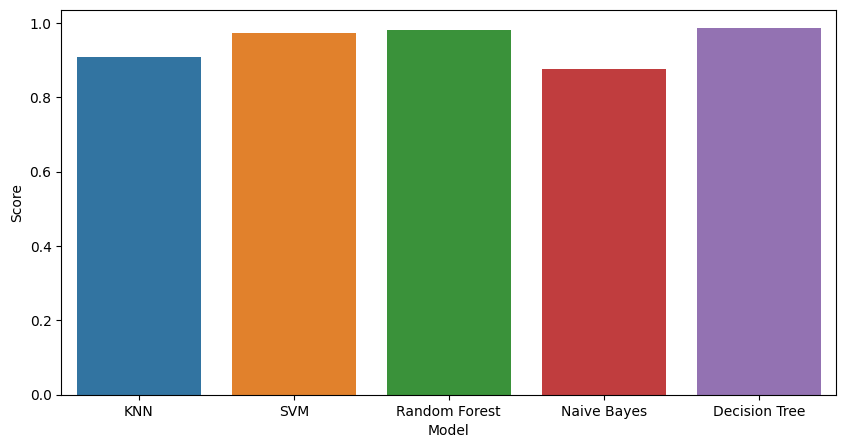

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='Score',data=models_classification)
plt.show()

# Creating a pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([('scaler', StandardScaler()), ('decision_tree', DecisionTreeClassifier(criterion = 'gini', max_depth = 4))])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier(max_depth=4))])

performance of the model:

In [34]:
pred = pipe.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, precision_score

confusion_matrix(y_test, pred)

array([[500,   1,   0],
       [  7,  78,   1],
       [  0,   0,  51]], dtype=int64)

# Dumping the model

In [36]:
import joblib
joblib.dump(pipe, 'cardiotocography_model.joblib')

['cardiotocography_model.joblib']